<a href="https://colab.research.google.com/github/julio4development/pytorch1/blob/main/022023_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
# For learning purposes, in this initial exercise
# we will know how the ideal model should be (a linear regression formula)
# output = weight * INPUT + bias

# and the initial parameters of that formula (we could have chosen others)
# weight = 0.7, bias = 0.3

weight = 0.7
bias = 0.3

# X es input data, y es output data
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1) # añadimos una dimensión
y = weight * X + bias

In [ ]:
# Veamos los 10 primeros elementos de X (input data)
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [ ]:
# Veamos los 10 primeros elementos de y (output data)
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [ ]:
# The purpose of this exercise
# is to build a model in pytorch
# that can learn the relationship between X and y
# and thus can predict how y will be for a given X

In [ ]:
# First, we are going to split the input and output data in
# training dataset (the model learns from this data)
# and testing dataset (the model gets evaluated on this data)

# We will not use validation dataset (the model gets tuned on this data) 
# in this exercise

In [ ]:
# Splitting the X and y datasets
train_split = int(0.8 * len(X)) # 80% de los datos irán al training dataset

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

In [ ]:
# Visualization of the initial data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")
  plt.legend(prop={"size": 14});

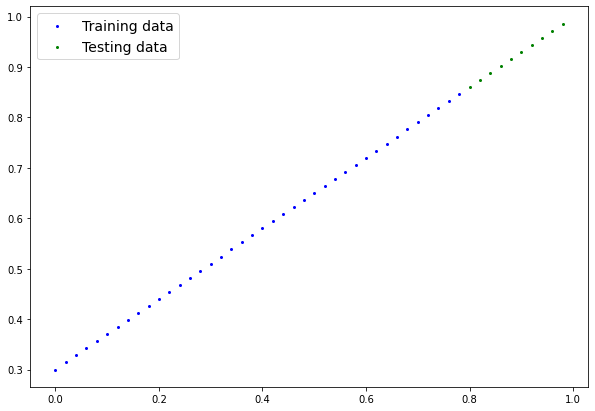

In [ ]:
plot_predictions();

In [ ]:
# Now we are going to write the prediction model
# first, we create a class inheriting all the functionality of the parent class nn.Module
# then, we set initial parameters manually
# finally, we set the forward function with the linear regression formula
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
# Let's create an instance of the model
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [ ]:
# Now let's see the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# And the state (gives also the names of the parameters)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Now let's see the predictions this model does for our testing input data
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
print(y_preds)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


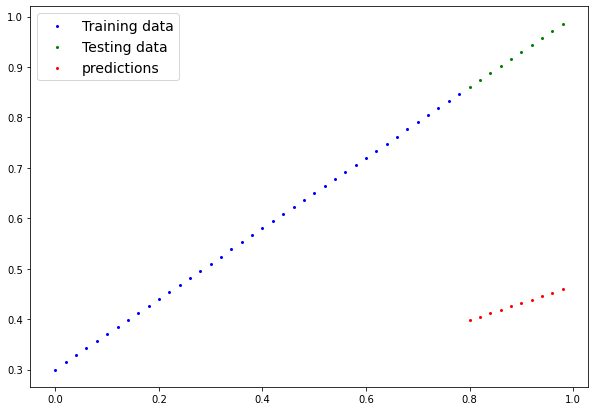

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
# Now let's see how far our predictions are from what we wanted
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [ ]:
# The model is not well tuned
# We are going to tune it using a loss function and a optimizer
# Since this is a linear regression problem (we are looking for one numeric result),
# we will decide to use:
# Loss function: mean absolute error
# Optimizer: stocastic gradient descent
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
# Once we have defined the loss function and the optimizer,
# we are now going to prepare the training loop and the testing loop
# that will be performed for each epoch
torch.manual_seed(42)
epochs = 200

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} - MAE Train Loss: {loss} - MAE Test Loss: {test_loss}")

Epoch: 0 - MAE Train Loss: 0.024458957836031914 - MAE Test Loss: 0.05646304413676262
Epoch: 10 - MAE Train Loss: 0.021020207554101944 - MAE Test Loss: 0.04819049686193466
Epoch: 20 - MAE Train Loss: 0.01758546568453312 - MAE Test Loss: 0.04060482233762741
Epoch: 30 - MAE Train Loss: 0.014155393466353416 - MAE Test Loss: 0.03233227878808975
Epoch: 40 - MAE Train Loss: 0.010716589167714119 - MAE Test Loss: 0.024059748277068138
Epoch: 50 - MAE Train Loss: 0.0072835334576666355 - MAE Test Loss: 0.016474086791276932
Epoch: 60 - MAE Train Loss: 0.0038517764769494534 - MAE Test Loss: 0.008201557211577892
Epoch: 70 - MAE Train Loss: 0.008932482451200485 - MAE Test Loss: 0.005023092031478882
Epoch: 80 - MAE Train Loss: 0.008932482451200485 - MAE Test Loss: 0.005023092031478882
Epoch: 90 - MAE Train Loss: 0.008932482451200485 - MAE Test Loss: 0.005023092031478882
Epoch: 100 - MAE Train Loss: 0.008932482451200485 - MAE Test Loss: 0.005023092031478882
Epoch: 110 - MAE Train Loss: 0.008932482451200

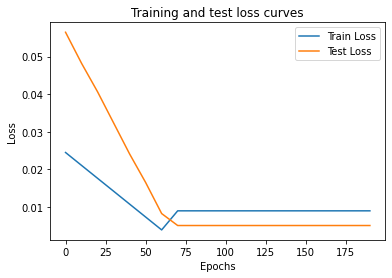

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [ ]:
# Once we have fine-tuned the model,
# now we are going to use it to predict outputs
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

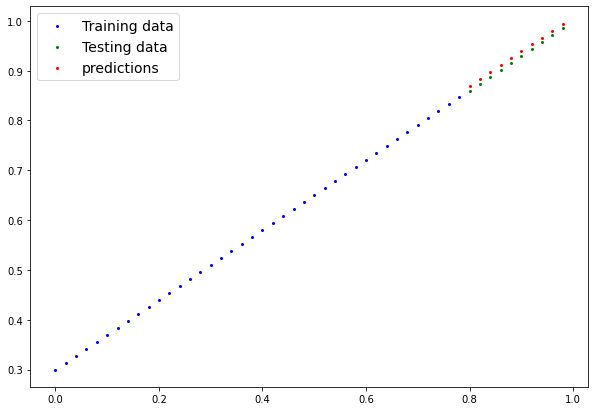

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
# Once we have a fine-tuned model, we are now going to save it
# IMPORTANT: the recommended way is to save the state_dict() of the model,
# because saving the whole model may break the code

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)
print(f"Model saved to: {MODEL_SAVE_PATH}")

Model saved to: models/01_pytorch_workflow_model_0.pth


In [ ]:
# Once we have a saved model, we are now going to load it
# IMPORTANT: never load a Pytorch model from a source you do not trust
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# Now let's confirm that the loaded model works as the model_0
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [ ]:
# Compare loaded model predictions with model_0 predictions
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])